<a href="https://colab.research.google.com/github/rajivnexgen/car_dekho/blob/main/Self_Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
#load the dataset on kernel
df=pd.read_csv("/content/drive/MyDrive/almabetter/self project/CAR DETAILS FROM CAR DEKHO.csv")

In [89]:
#first look
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [90]:
#random look of data
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1435,Hyundai i10 Magna LPG,2014,290000,29000,LPG,Individual,Manual,First Owner
1160,Maruti Alto LX,2011,180000,36000,Petrol,Dealer,Manual,First Owner
2096,Maruti Omni MPI STD BSIV,2012,250000,90000,Petrol,Individual,Manual,First Owner
3597,Hyundai i20 1.4 Sportz,2017,740000,60000,Diesel,Individual,Manual,First Owner
3487,Hyundai i10 Magna 1.1 iTech SE,2015,300000,48000,Petrol,Dealer,Manual,First Owner


In [91]:
df=df.reindex(columns=['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'selling_price'])

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
 6   owner          4340 non-null   object
 7   selling_price  4340 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [93]:
df.describe()

,year,km_driven,selling_price
count,4340.000000,4340.000000,4.340000e+03
mean,2013.090783,66215.777419,5.041273e+05
std,4.215344,46644.102194,5.785487e+05
min,1992.000000,1.000000,2.000000e+04
25%,2011.000000,35000.000000,2.087498e+05
50%,2014.000000,60000.000000,3.500000e+05
75%,2016.000000,90000.000000,6.000000e+05
max,2020.000000,806599.000000,8.900000e+06


# Dataset Information
name: name of the car

year: car buy year

selling_price : selling price of car

km_driven: how much km is driven till now

fuel: types of fuel based car(petrol or diesel)

seller_type: dealer or individual

transmission:manual or automatic

owner: first , second or third

In [94]:
#check duplicated in dataset
df.duplicated().sum()

763

In [95]:
df[df.duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
13,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
14,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
15,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
16,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
17,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,15000,Diesel,Individual,Manual,Third Owner,599000
4308,Maruti Alto 800 LXI,2018,35000,Petrol,Individual,Manual,First Owner,200000
4309,Datsun GO Plus T,2017,10171,Petrol,Dealer,Manual,First Owner,350000
4310,Renault Duster 110PS Diesel RxL,2015,41123,Diesel,Dealer,Manual,First Owner,465000


In [96]:
#drop duplicates row
df.drop_duplicates(inplace=True)

In [97]:
df.duplicated().sum()

0

In [98]:
df.shape

(3577, 8)

In [99]:
#check missing values
df.isna().sum()

name             0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
selling_price    0
dtype: int64

In [100]:
df.columns

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'selling_price'],
      dtype='object')

# Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


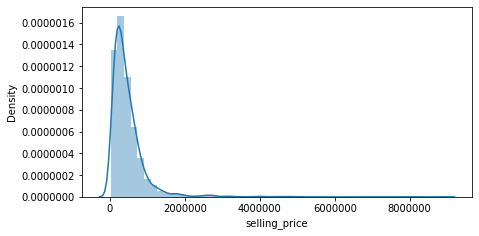

In [101]:
#Distribution Plot of dependent variable
plt.figure(figsize=(7,3.5))
plt.ticklabel_format(style='plain')#prevent exponential notation
sns.distplot(df["selling_price"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


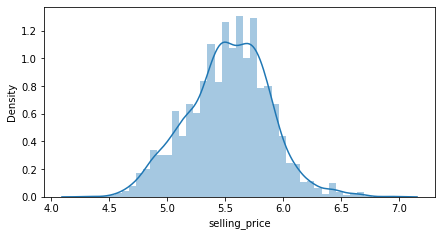

In [102]:
plt.figure(figsize=(7,3.5))

sns.distplot(np.log10(df["selling_price"]))

Observed the selling price is getting left side skeewing , so we have to do log transformation of dependent variables .

**Task 1:** Log Transformation of dependent variables



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


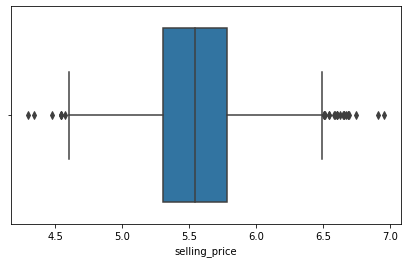

In [103]:
#check with boxplot for outlier detection
plt.figure(figsize=(7,4))
sns.boxplot(np.log10(df["selling_price"]))

May be outlier in dependent feature but we can't validate so we will check further with bivariate analysis

In [104]:
numerical_features=df.describe().columns

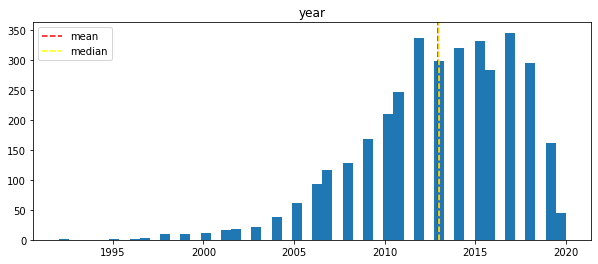

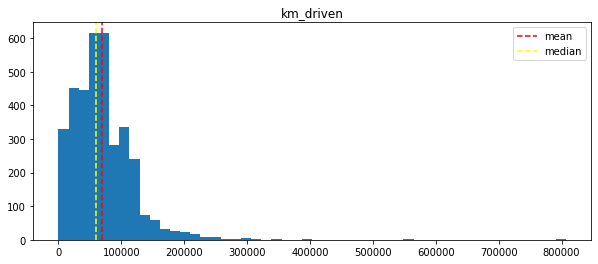

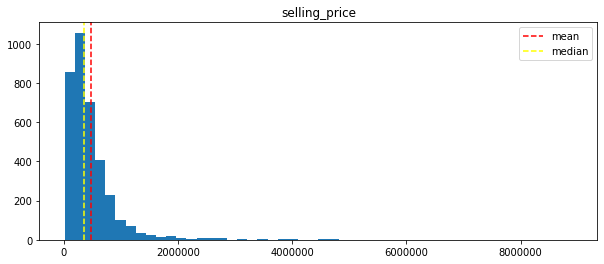

In [105]:
# univariate analysis on numerical features
from matplotlib import legend

for col in numerical_features:
  plt.figure(figsize=(10,4))
  ax=plt.axes()
  plt.hist(df[col],bins=50,axes=ax)
  plt.ticklabel_format(style='plain')#prevent exponential notation
  ax.axvline(x=df[col].mean(),color="red",linestyle="dashed",label="mean")
  ax.axvline(x=df[col].median(),color="yellow",linestyle="dashed",label="median")
  ax.legend()
  plt.title(col)
plt.show()

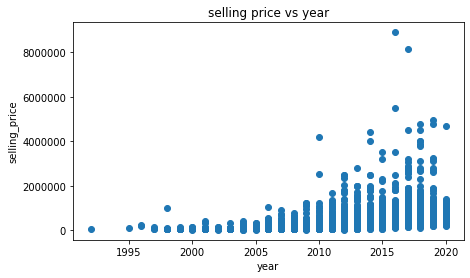

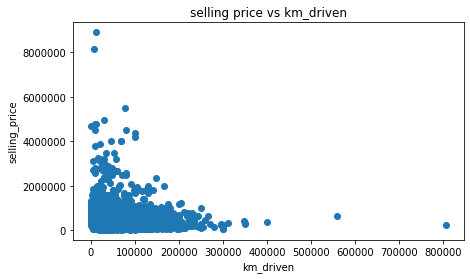

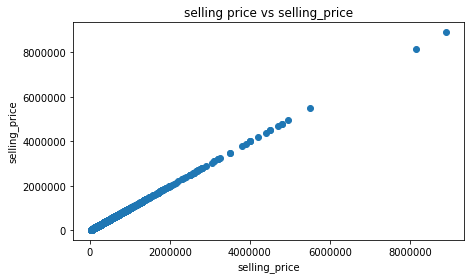

In [119]:
#bivariate analysis of numerical features with selling price
for col in numerical_features:
  
  plt.figure(figsize=(7,4),)
  plt.title(f'selling price vs {col}')
  plt.xlabel(col)
  plt.ylabel("selling_price")
  plt.scatter(df[col],df["selling_price"])
  plt.ticklabel_format(style='plain')#prevent exponential notation
  plt.show()

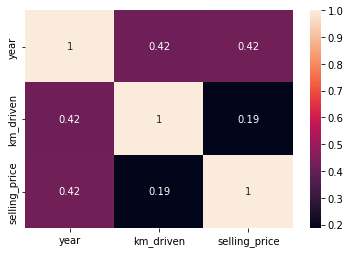

In [107]:
#corelation
correlation=df.corr()

sns.heatmap(abs(correlation),annot=True)

In [108]:
#check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
def calc_vif(X):
  #calculating VIF
  vif_pd=pd.DataFrame()
  vif_pd["features"]=X.columns
  vif_pd["VIF"]=[vif(X.values,i)for i in range(X.shape[1])]

  return(vif_pd)

In [109]:
calc_vif(df[[i for i in numerical_features if i not in ["selling_price"]]])

,features,VIF
0,year,3.110934
1,km_driven,3.110934


Normal in range it should be under the range in 10(vif<=10).

Now looks ok there is no any multicollinearity on this.

In [110]:
df["name"].unique()


array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [111]:
df["company"]=df["name"].apply(lambda x: x.split(" ")[0])

In [112]:
df.sample(5)

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price,company
2279,Renault KWID 1.0 RXT Optional,2017,60000,Petrol,Individual,Manual,First Owner,400000,Renault
191,Mercedes-Benz New C-Class 220 CDI AT,2013,35000,Diesel,Individual,Automatic,First Owner,1500000,Mercedes-Benz
1114,Toyota Innova Crysta 2.5 VX BS IV,2011,120000,Diesel,Individual,Manual,First Owner,520000,Toyota
2776,Chevrolet Beat Diesel LT,2013,46000,Diesel,Individual,Manual,First Owner,195000,Chevrolet
2608,Hyundai i20 1.2 Spotz,2017,70000,Petrol,Individual,Manual,Second Owner,600000,Hyundai


In [113]:
df["company"].value_counts()

Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Jaguar              5
Mitsubishi          5
Land                5
Volvo               4
Jeep                3
Ambassador          3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: company, dtype: int64

In [114]:
category_features=[x for x in df.describe(include=["object","category"]).columns if x not in "name" ]

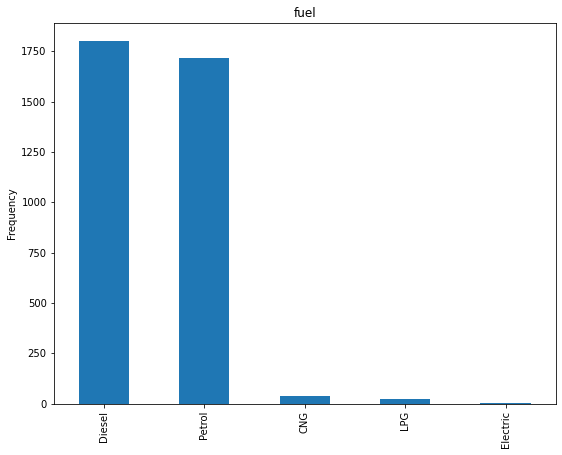

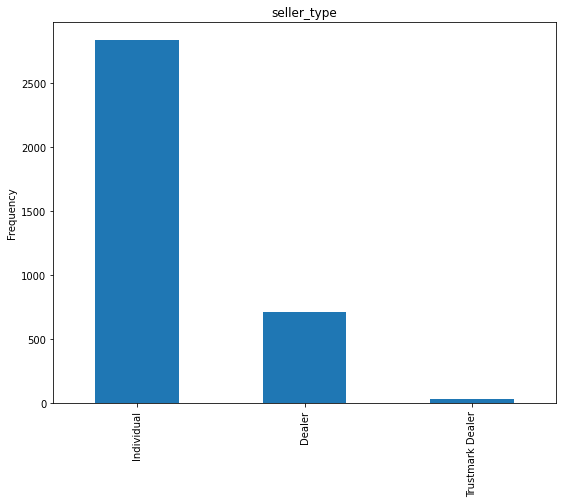

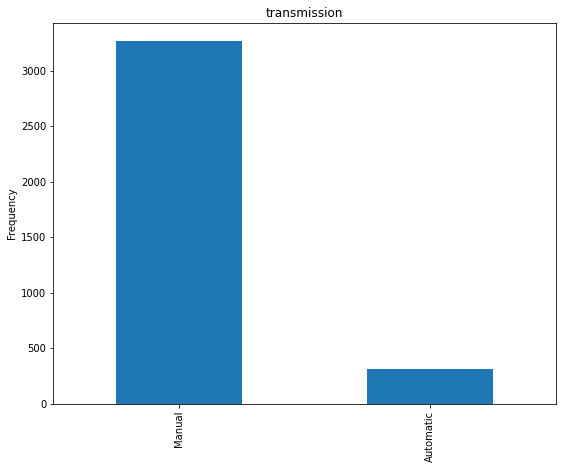

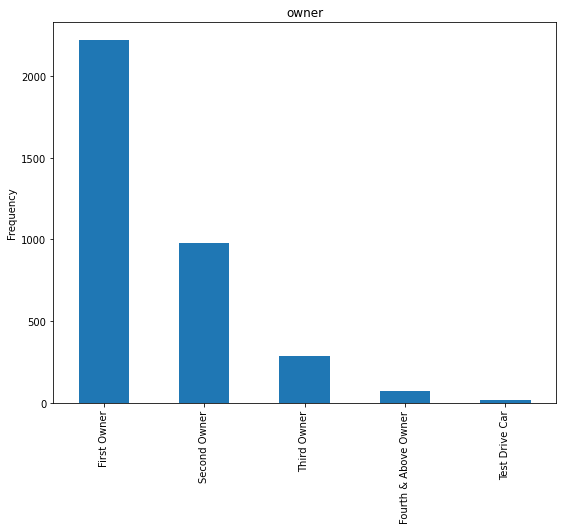

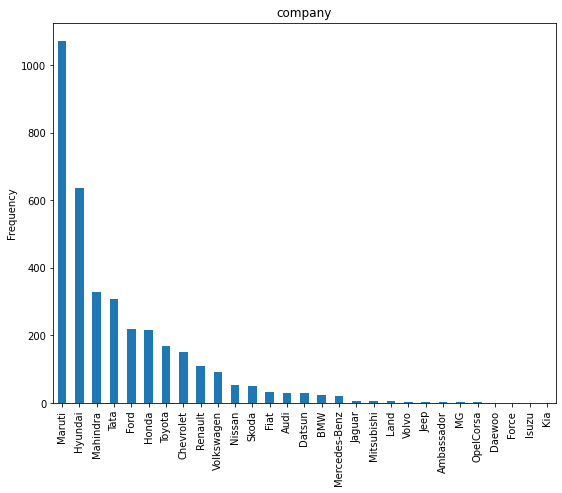

In [115]:
from matplotlib.figure import Figure
for col in category_features:
  vc=df[col].value_counts()
  
  fig=plt.figure(figsize=(9,7))
  ax=fig.gca()
  ax.set_title(col)
  ax.set_ylabel("Frequency")
  vc.plot.bar(ax=ax)
  plt.show()
  

Categorical with dependent feature

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

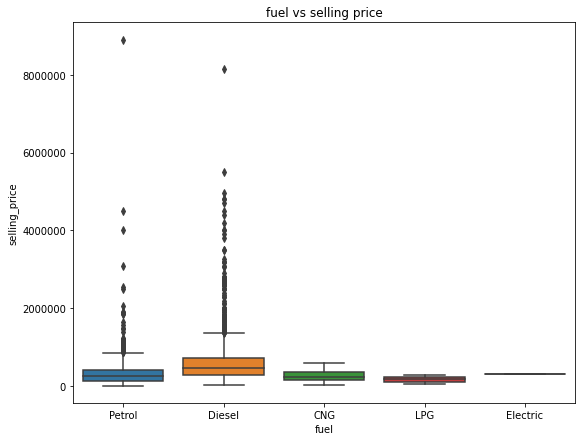

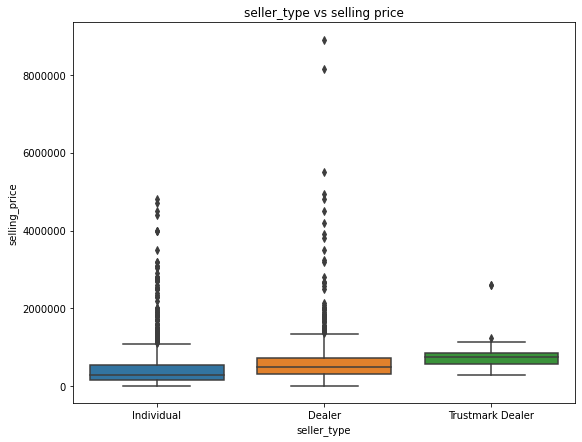

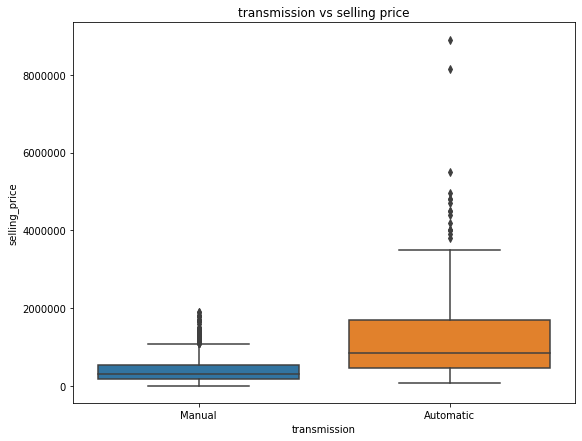

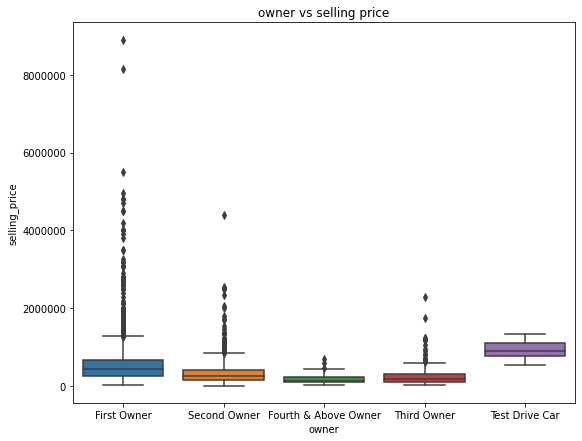

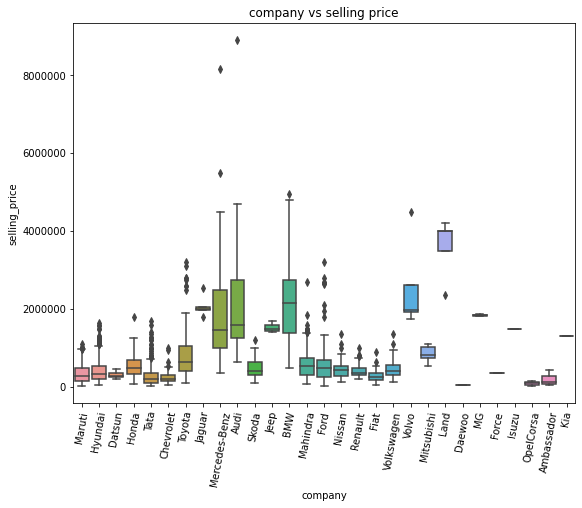

In [124]:
for col in category_features:
  fig=plt.figure(figsize=(9,7))
  ax=fig.gca()
  ax.set_title(col+' vs selling price')
  plt.ticklabel_format(style='plain')#prevent exponential notation
  if col=="company":
    plt.xticks(rotation=80)
  sns.boxplot(df[col],df["selling_price"],ax=ax)

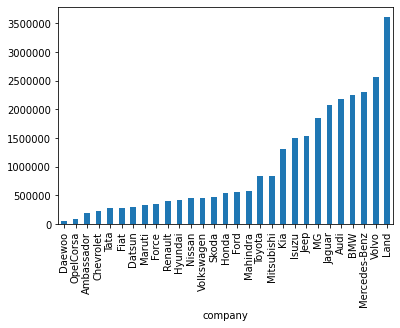

In [117]:
#selling mean price with company
plt.ticklabel_format(style='plain')#prevent exponential notation
df.groupby(["company"])["selling_price"].mean().sort_values().plot.bar()